# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

**AI-generated notebook – Use with caution.**  
This notebook was created automatically by an AI. The analyses and code have not been fully reviewed. Exercise caution and independently verify results before drawing scientific conclusions.

## Overview

This notebook provides an introduction and exploratory analysis for [Dandiset 001333 (Version 0.250327.2220)](https://dandiarchive.org/dandiset/001333/0.250327.2220):  
**"Parkinson's Electrophysiological Signal Dataset (PESD)"**

PESD contains electrophysiological signals from both healthy and Parkinsonian subjects, modeled and simulated to study neural activity in relevant brain structures.  

**Dataset citation:**  
Biswas, Ananna (2025) Parkinson's Electrophysiological Signal Dataset (PESD) (Version 0.250327.2220) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001333/0.250327.2220

### About the Dataset
- Signals include **Beta Average Rectified Voltage (ARV)** and **Local Field Potential (LFP)** from the subthalamic nucleus (STN).
- **Beta ARV:** Calculated by rectifying beta-band LFP after filtering; used as a biomarker for Parkinson's symptoms.
- **LFP:** Reflects local population neural activity.
- The dataset includes electrode metadata and multiple simulated sessions.

More details: ["Preliminary Results of Neuromorphic Controller Design and a Parkinson's Disease Dataset Building for Closed-Loop Deep Brain Stimulation"](https://arxiv.org/abs/2407.17756)

## What this Notebook Covers
- Listing and loading Dandiset assets using the DANDI API
- Demonstration of how to load NWB files directly from their remote URLs
- Examining key metadata and structure within an example NWB file
- Visualizing the beta-band processed LFP signal (time series and distribution)
- Exploring electrode metadata
- Suggestions for further analysis and research

## Required Packages
This notebook assumes the following Python packages are already installed:
- numpy
- pandas
- matplotlib
- pynwb
- h5py
- remfile
- dandi (for the DANDI API)

## Listing Assets in the Dandiset

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001333", "0.250327.2220")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Parkinson's Electrophysiological Signal Dataset (PESD)
Dandiset URL: https://dandiarchive.org/dandiset/001333/0.250327.2220

First 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb (ID: 5409700b-e080-44e6-a6db-1d3e8890cd6c)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb (ID: da77917e-655c-4eeb-a0a6-7529a8a35901)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb (ID: aa743a96-e79b-40b1-a0df-55ef3460e856)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb (ID: 068afe41-3b8e-402f-91d4-9f297df677a2)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb (ID: b344c8b7-422f-46bb-b016-b47dc1e87c65)


## Loading and Exploring an Example NWB File

We'll focus on the NWB file:

```
sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb
```
URL: [Direct download link](https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/)

[🌐 View this file in Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/&dandisetId=001333&dandisetVersion=draft)

Below is the approach for streaming and reading this remote NWB file.

In [2]:
import pynwb
import h5py
import remfile

# Load file from remote DANDI asset URL
url = "https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("NWB File loaded successfully.")
print("Session description:", nwb.session_description)
print("Identifier:", nwb.identifier)
print("Start time:", nwb.session_start_time)
print("File create date(s):", nwb.file_create_date)

NWB File loaded successfully.
Session description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Identifier: 7a68ea11-865a-481a-a5fd-d91fe6def653
Start time: 2025-03-27 16:53:27.990500-04:00
File create date(s): [datetime.datetime(2025, 3, 27, 16, 53, 28, 55430, tzinfo=tzoffset(None, -14400))]


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Let's summarize the NWB file structure and key info:

**Subject:** healthy-simulated-beta (species: Homo sapiens, [simulated])  
**Lab:** BrainX Lab, Michigan Technological University  
**Signals:** Processed Beta Band Voltage (ARV, volts) from multiple simulated electrodes  
**Electrodes:** Grouped into 4 shanks (shank0 - shank3), 3 electrodes per shank  
**Processing Modules:**  
  - `ecephys`: Contains `LFP` with `Beta_Band_Voltage` ElectricalSeries  

| Key | Description |
|-----|-------------|
| nwb.processing["ecephys"] | Processed electrophysiology |
| LFP | Local Field Potential container |
| Beta_Band_Voltage | Main processed signal (ARV) |

For more on metadata structure, see NWB documentation.

## Electrode Table Overview

Let's view the electrode metadata (id, location, group, group_name, label):

In [3]:
import pandas as pd

electrodes_df = nwb.electrodes.to_dataframe()
display(electrodes_df)

,location,group,group_name,label
id,,,,
0,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x13024...,shank0,shank0_elec0
1,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x13024...,shank0,shank0_elec1
2,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x13024...,shank0,shank0_elec2
3,Simulated Cortico-basal-ganglia network of brain,shank1 pynwb.ecephys.ElectrodeGroup at 0x13024...,shank1,shank1_elec0
4,Simulated Cortico-basal-ganglia network of brain,shank1 pynwb.ecephys.ElectrodeGroup at 0x13024...,shank1,shank1_elec1
5,Simulated Cortico-basal-ganglia network of brain,shank1 pynwb.ecephys.ElectrodeGroup at 0x13024...,shank1,shank1_elec2
6,Simulated Cortico-basal-ganglia network of brain,shank2 pynwb.ecephys.ElectrodeGroup at 0x13024...,shank2,shank2_elec0
7,Simulated Cortico-basal-ganglia network of brain,shank2 pynwb.ecephys.ElectrodeGroup at 0x13024...,shank2,shank2_elec1
8,Simulated Cortico-basal-ganglia network of brain,shank2 pynwb.ecephys.ElectrodeGroup at 0x13024...,shank2,shank2_elec2


This table shows 12 electrodes across 4 simulated shanks (`shank0`–`shank3`). All are registered as 'Simulated Cortico-basal-ganglia network of brain'.

## Visualizing Beta Band Voltage Signal

We now visualize the main processed signal — Beta Band Voltage — as a time series and as a distribution.
The signal units are volts. There are 1400 time samples in this recording.

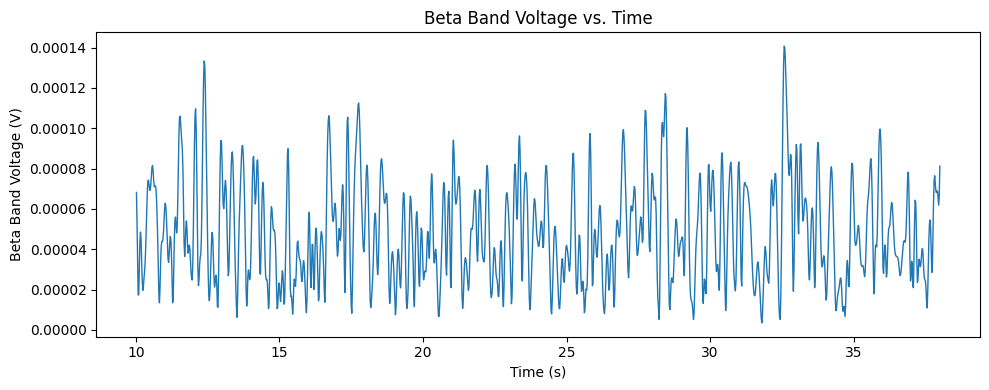

Data mean: 0.000048, std: 0.000025, min: 0.000004, max: 0.000141


In [4]:
import numpy as np
import matplotlib.pyplot as plt

beta = nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"]
data = beta.data[:]
timestamps = beta.timestamps[:]

plt.figure(figsize=(10, 4))
plt.plot(timestamps, data, color="tab:blue", lw=1)
plt.xlabel("Time (s)")
plt.ylabel("Beta Band Voltage (V)")
plt.title("Beta Band Voltage vs. Time")
plt.tight_layout()
plt.show()

print(f"Data mean: {np.mean(data):.6f}, std: {np.std(data):.6f}, min: {np.min(data):.6f}, max: {np.max(data):.6f}")

This shows oscillatory activity in the beta band; peak-to-peak voltage is in the range ~0 to 0.00014 V.

### Signal Distribution

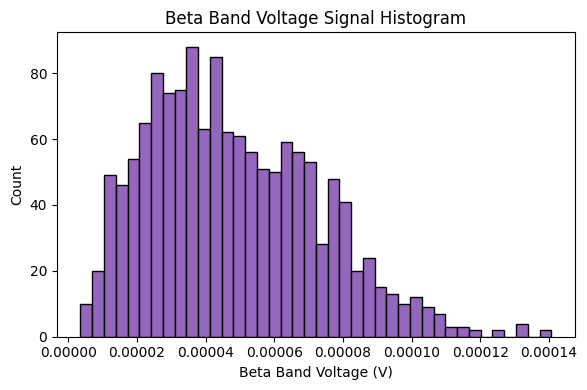

In [5]:
plt.figure(figsize=(6, 4))
plt.hist(data, bins=40, color='tab:purple', edgecolor='black')
plt.xlabel("Beta Band Voltage (V)")
plt.ylabel("Count")
plt.title("Beta Band Voltage Signal Histogram")
plt.tight_layout()
plt.show()

The histogram shows a right-skewed unimodal distribution, with most values clustered near 0.00004 V and a gradual decline at higher voltages.

## Summary and Future Directions

This notebook demonstrated how to:
- Access and browse a Dandiset using the DANDI API
- Load remote NWB files in Python (no file download required)
- Explore key metadata and structure
- Visualize main processed signals both time-domain and distributionally
- Summarize electrode metadata

Possible extensions:
- Analyze and visualize other sessions or compare across subjects/groups
- Explore additional signals or raw LFP if available
- Extract time-frequency features or spectral content per electrode
- Statistical comparison of healthy vs. Parkinsonian simulated groups

For in-depth questions, consult the original dataset paper or use interactive platforms such as [Neurosift](https://neurosift.app) for further data exploration.